# <center><u><font color="red">Movie Attributes Impact on Audience Movie Ratings</font></u></center>

### Initial Configuration

In [1]:
#*******************************************************************************
# Dependencies and Setup
#*******************************************************************************
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

#*******************************************************************************
# Load Movie Metadata and Ratings Data Files
#*******************************************************************************
movies_metadata_to_load = "Movie_Datasets/movies_metadata.csv"
ratings_to_load = "Movie_Datasets/ratings.csv"


### Process the Movie Metadata dataframe

In [2]:
#*******************************************************************************
# Read the Movie MetaData from the file and store in a DataFrame
#*******************************************************************************
movies_metadata_df = pd.read_csv(movies_metadata_to_load, low_memory=False)


In [3]:
#*******************************************************************************
# Remove rows with invalid id's and convert the id to a number.
#*******************************************************************************
num_movies_metadata_df = (movies_metadata_df.drop("id", axis=1)
                          .join(movies_metadata_df["id"].apply(pd.to_numeric, errors='coerce')))
num_movies_metadata_df["id"] = pd.to_numeric(num_movies_metadata_df["id"])


In [4]:
#*******************************************************************************
# Rename the "id" colum header to "movieId" to alighn with the Ratings dataframe
#*******************************************************************************
renamed_movies_metadata_df = num_movies_metadata_df.rename(columns={"id":"movieId"})


In [5]:
#*******************************************************************************
# Print the number of movies in the dataframe.
#*******************************************************************************
print(f"There are {num_movies_metadata_df.shape[0]} movies included in the Movie MetaData dataset.")


There are 45466 movies included in the Movie MetaData dataset.


### Process the Ratings dataframe

In [6]:
#*******************************************************************************
# Read the Rating Data from the file and store in a DataFrame
#*******************************************************************************
ratings_df = pd.read_csv(ratings_to_load)


In [7]:
#*******************************************************************************
# Remove rows with invalid movieId's and convert the movieId to a number.
#*******************************************************************************
num_movies_ratings_df = (ratings_df.drop("movieId", axis=1)
                          .join(ratings_df["movieId"].apply(pd.to_numeric, errors='coerce')))
num_movies_ratings_df["movieId"] = pd.to_numeric(num_movies_ratings_df["movieId"])


In [8]:
#*******************************************************************************
# Group the movie rating data by movie and average the ratings provided by the 
# individual users for each movie.
#*******************************************************************************
ave_movie_rating = num_movies_ratings_df.groupby(["movieId"]).mean()


In [9]:
#*******************************************************************************
# Print the number of movies in the dataframe.
#*******************************************************************************
print(f"There are {ave_movie_rating.shape[0]} movies included in this dataset.")


There are 45115 movies included in this dataset.


### Merge the Two Dataframes and Clean Up the Data

In [10]:
#*******************************************************************************
# Merve Movie Metadata and Ratings data together based on teh "movieId" column.
#*******************************************************************************
merge_table = pd.merge(renamed_movies_metadata_df, ave_movie_rating, on="movieId")
merge_table.head(2)


,adult,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,status,tagline,title,video,vote_average,vote_count,movieId,userId,rating,timestamp
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,...,Released,NaN,Toy Story,False,7.7,5415.0,862.0,133828.86631,3.598930,9.727758e+08
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,17.015539,...,Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0,8844.0,138698.00813,3.760163,1.268060e+09


In [11]:
#*******************************************************************************
# Trim the data to only include the columns we need for the analysis.
#*******************************************************************************
trimmed_merge_table = merge_table[["budget", "genres", "imdb_id", "production_countries", 
                                   "release_date", "runtime", "revenue", "title", 
                                   "vote_average", "vote_count", "movieId", "rating", "popularity"]]

In [12]:
#*******************************************************************************
# Trim the data to only include the columns we need for the analysis.
#*******************************************************************************
clean_trimmed_merge_table = trimmed_merge_table.dropna(how='any')


In [42]:
#*******************************************************************************
# Print the number of movies in the dataframe.
#*******************************************************************************
print(f"There are {clean_trimmed_merge_table.shape[0]} movies included in this dataset.")


There are 7542 movies included in this dataset.


## Create runtime distribution pie graph

In [14]:
#*******************************************************************************
# Print the number of movies in the dataframe.
#*******************************************************************************
trimmed_runtime_movies_df = clean_trimmed_merge_table.loc[clean_trimmed_merge_table["runtime"] < 900, :]

#*******************************************************************************
# Print the number of movies in the dataframe.
#*******************************************************************************
print(f"There are {trimmed_runtime_movies_df.shape[0]} movies included in this dataset.")


There are 7542 movies included in this dataset.


In [15]:
#*******************************************************************************
# Create the bins by range of runtime hours
#*******************************************************************************
bins = [0, 60, 120, 180, 900]

#*******************************************************************************
# Create the names for the four groups of runtime hours
#*******************************************************************************
group_names = ["< 1 Hrs", "1-2 Hrs", "2-3 Hrs", "> 3 Hrs" ]


In [16]:
#*******************************************************************************
# Create a new column to store the range of runtime hours for each movie.
#*******************************************************************************
trimmed_runtime_movies_df["Runtime Breakdown"] = pd.cut(trimmed_runtime_movies_df["runtime"], 
                                                        bins, labels=group_names)


In [17]:
#*******************************************************************************
# Create a new dataframe to hold the 3 columns needed for this graph, group 
# the data by the range of runtime hours (Runtime Breakdown) and get the count 
# for each set of hours.
#*******************************************************************************
runtime_count_df = trimmed_runtime_movies_df[["rating", "runtime", "Runtime Breakdown"]]
runtime_count_df = runtime_count_df.groupby("Runtime Breakdown")
runtime_count_df.count()["runtime"]

Runtime Breakdown
< 1 Hrs     362
1-2 Hrs    5875
2-3 Hrs    1029
> 3 Hrs     109
Name: runtime, dtype: int64

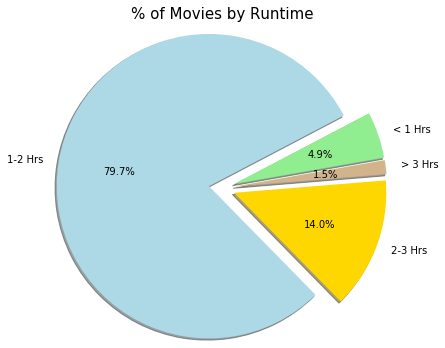

In [18]:
#*******************************************************************************
# Create the pie chart showing the breakdown of movies by runtime range.
#*******************************************************************************

#*******************************************************************************
# Define appearance for the pie chart
#*******************************************************************************
colors = ["lightgreen","lightblue", "gold", "tan"]
explode = (0.15,0.15,0.15,0.15)

#*******************************************************************************
# Define the title for the pie chart
#*******************************************************************************
plt.title("% of Movies by Runtime", y=1.25, fontsize=15)

#*******************************************************************************
# Define pie chart
#*******************************************************************************
plt.pie(runtime_count_df.count()["runtime"], explode=explode, 
        labels=group_names, colors=colors, autopct="%1.1f%%", shadow=True, 
        startangle=10, radius=1.75)

#*******************************************************************************
# Show Figures
#*******************************************************************************
plt.show()

## Create Bar chart of average rating / runtime

In [19]:
#*******************************************************************************
# Remove rows with invalid budget's and convert the budget to a number.
#*******************************************************************************
num_budget_df = (trimmed_runtime_movies_df.drop("budget", axis=1)
                          .join(trimmed_runtime_movies_df["budget"].apply(pd.to_numeric, errors='coerce')))
num_budget_df["budget"] = pd.to_numeric(num_budget_df["budget"])


In [20]:
#*******************************************************************************
# Remove rows with invalid revenue's and convert the revenue to a number.
#*******************************************************************************
num_revenue_df = (num_budget_df.drop("revenue", axis=1)
                          .join(num_budget_df["revenue"].apply(pd.to_numeric, errors='coerce')))
num_revenue_df["revenue"] = pd.to_numeric(num_revenue_df["revenue"])


In [21]:
#*******************************************************************************
# Create a new dataframe to hold the 3 columns needed for this graph, group 
# the data by the range of runtime hours (Runtime Breakdown) and get the average 
# for each set of hours.
#*******************************************************************************
ratings_runtime_ave_df = num_revenue_df[["rating", "runtime", "Runtime Breakdown"]]
ratings_runtime_ave_df = ratings_runtime_ave_df.groupby("Runtime Breakdown").mean()


In [22]:
#*******************************************************************************
# Filter the DataFrame down only to those columns to chart (index is the 
# Runtime Breakdown)
#*******************************************************************************
runtime_and_ave_df = ratings_runtime_ave_df[["rating"]]


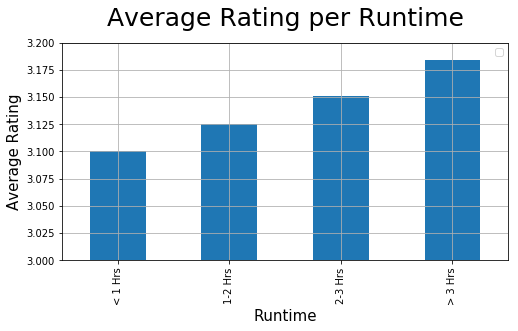

In [23]:
#*******************************************************************************
# Create a bar chart of the data
#*******************************************************************************
runtime_and_ave_df.plot(kind="bar", figsize=(8,4))

#*******************************************************************************
# Set a title, axis labels and clear the legend
#*******************************************************************************
plt.title("Average Rating per Runtime", y=1.05, fontsize=25)
plt.xlabel("Runtime", y=1.05, fontsize=15)
plt.ylabel("Average Rating", fontsize=15)
plt.legend("")

#*******************************************************************************
# Set the upper and lower y values to make it easier to see the difference.
#*******************************************************************************
plt.ylim([3,3.2])

#*******************************************************************************
# Add the grid to the chart and display the chart
#*******************************************************************************
plt.grid()
plt.show()


## Define data for profit (revenue - budget) vs ratings

### Create profit distribution pie graph

In [24]:
#*******************************************************************************
# Remove rows with invalid budget's and convert the budget to a number.
#*******************************************************************************
num_fin_budget_df = (clean_trimmed_merge_table.drop("budget", axis=1)
                     .join(clean_trimmed_merge_table["budget"].apply(pd.to_numeric, errors='coerce')))
num_fin_budget_df["budget"] = pd.to_numeric(num_fin_budget_df["budget"])


In [25]:
#*******************************************************************************
# Remove rows with invalid revenue's and convert the revenue to a number.
#*******************************************************************************
num_fin_revenue_df = (num_fin_budget_df.drop("revenue", axis=1)
                          .join(num_fin_budget_df["revenue"].apply(pd.to_numeric, errors='coerce')))
num_fin_revenue_df["revenue"] = pd.to_numeric(num_fin_revenue_df["revenue"])


In [26]:
#*******************************************************************************
# Eliminate any budget items that are less than or equal to zero.
#*******************************************************************************
clean_budget_df = num_fin_revenue_df.loc[num_revenue_df["budget"] > 0, :]

#*******************************************************************************
# Print the number of movies in the dataframe.
#*******************************************************************************
print(f"There are {clean_budget_df.shape[0]} movies included in this dataset.")


There are 2124 movies included in this dataset.


In [27]:
#*******************************************************************************
# Eliminate any revenue items that are less than or equal to zero.
#*******************************************************************************
financial_df = clean_budget_df.loc[clean_budget_df["revenue"] > 0, :]

#*******************************************************************************
# Print the number of movies in the dataframe.
#*******************************************************************************
print(f"There are {financial_df.shape[0]} movies included in this dataset.")


There are 1575 movies included in this dataset.


In [28]:
#*******************************************************************************
# Convert revenue and budget to numbers
#*******************************************************************************
financial_df["revenue"] = pd.to_numeric(financial_df["revenue"])
financial_df["budget"] = pd.to_numeric(financial_df["budget"])

#*******************************************************************************
# Add the Profit (revenue - budget) to the dataframe
#*******************************************************************************
pd.set_option('mode.chained_assignment', None)
#financial_df.is_copy = False
financial_df["Profit"] = (financial_df["revenue"] - financial_df["budget"])/1000000


C:\Users\rodsk\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\rodsk\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [29]:
#*******************************************************************************
# Limit the dtaframe to the columns needed for the analysis
#*******************************************************************************
financial_df = financial_df[["rating", "budget", "revenue", "Profit"]]


In [48]:
#*******************************************************************************
# Determine the minimum and maximum profit values to create bins
#*******************************************************************************
minProfit = financial_df["Profit"].min()
maxProfit = financial_df["Profit"].max()
print(f"min profit is ${minProfit}")
print(f"max profit is ${maxProfit}")


min profit is $-98.301101
max profit is $1645.034188


In [31]:
#*******************************************************************************
# Create the bins by several Profit ranges
#*******************************************************************************
fin_bins = [-100, 0, 350, 700, 1646]

#*******************************************************************************
# Create the names for the four groups of Profit ranges
#*******************************************************************************
fin_group_names = ["< $0", "\$0-\$350", "\$350-\$700", "> $700" ]


In [32]:
#*******************************************************************************
# Create a new column to store the Profit range for each movie.
#*******************************************************************************
financial_df["Profit Range (millions)"] = pd.cut(financial_df["Profit"], fin_bins, 
                                                 labels=fin_group_names)


In [33]:
#*******************************************************************************
# Create a new dataframe to hold the 3 columns needed for this graph, group 
# the data by the rProfit ranges (Profit Range (millions)) and get the count 
# for each set ranges.
#*******************************************************************************
financial_count_df = financial_df[["rating", "Profit", "Profit Range (millions)"]]
financial_count_df = financial_count_df.groupby("Profit Range (millions)")
financial_count_df.count()["Profit"]


Profit Range (millions)
< $0            323
\$0-\$350      1155
\$350-\$700      76
> $700           21
Name: Profit, dtype: int64

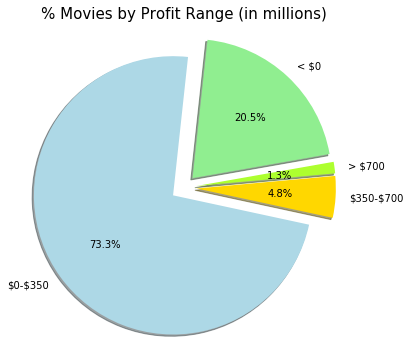

In [34]:
#*******************************************************************************
# Create the pie chart showing the breakdown of movies by Profit range.
#*******************************************************************************

#*******************************************************************************
# Define appearance for the pie chart
#*******************************************************************************
colors = ["lightgreen","lightblue", "gold", "greenyellow"]
explode = (0.15,0.15,0.15,0.15)

#*******************************************************************************
# Define the title for the pie chart
#*******************************************************************************
plt.title("% Movies by Profit Range (in millions)", y=1.25, fontsize=15)

#*******************************************************************************
# Define pie chart
#*******************************************************************************
plt.pie(financial_count_df.count()["Profit"], explode=explode, 
        labels=fin_group_names, colors=colors, autopct="%1.1f%%", shadow=True, 
        startangle=10, radius=1.6)

#*******************************************************************************
# Show Figures
#*******************************************************************************
plt.show()

## Create Bar chart of average rating / runtime

In [35]:
#*******************************************************************************
# Create a new dataframe to hold the 3 columns needed for this graph, group 
# the data by the Profit range (Profit Range (millions)) and get the average 
# for each set of hours.
#*******************************************************************************
financial_ave_df = financial_df[["rating", "Profit", "Profit Range (millions)"]]
financial_ave_df = financial_ave_df.groupby("Profit Range (millions)").mean()


In [36]:
#*******************************************************************************
# Filter the DataFrame down only to the columns needed for the chart (index is 
# the Profit Range (millions))
#*******************************************************************************
financial_ave_df = financial_ave_df[["rating"]]


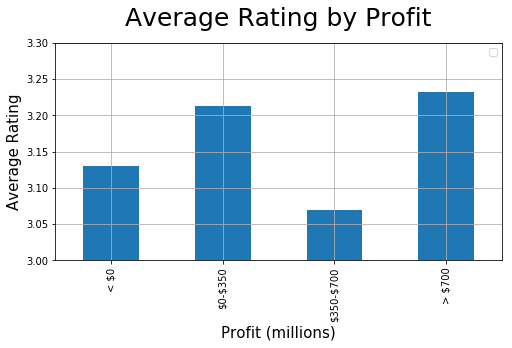

In [37]:
#*******************************************************************************
# Create a bar chart of the data
#*******************************************************************************
financial_ave_df.plot(kind="bar", figsize=(8,4))

#*******************************************************************************
# Set a title, axis labels and clear the legend
#*******************************************************************************
plt.title("Average Rating by Profit", y=1.05, fontsize=25)
plt.xlabel("Profit (millions)", y=1.05, fontsize=15)
plt.ylabel("Average Rating", fontsize=15)
plt.legend("")

#*******************************************************************************
# Set the upper and lower y values to make it easier to see the difference.
#*******************************************************************************
plt.ylim([3,3.3])

#*******************************************************************************
# Add the grid to the chart and display the chart
#*******************************************************************************
plt.grid()
plt.show()
